Mount Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd
!ls
%cd /content/drive/My\ Drive/
!pwd
!ls

/content
drive  sample_data
/content/drive/My Drive/iot
/content/drive/My Drive/iot
BG3_reviews_updated.csv  data-visualization.ipynb  wordcloud.png


Import libraries

In [3]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import base64
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io

In [4]:
df_ = pd.read_csv('BG3_reviews_updated.csv')
df = df_.copy()

# Convert review data to string to ensure it does not contain non-string values or missing objects
df['review'] = df['review'].astype(str)

# Convert timestamp to datetime
df['timestamp_updated']
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'], unit = 's')

# Create additional columns if needed, e.g., year of review
df['year'] = df['timestamp_updated'].dt.year
df['month'] = df['timestamp_updated'].dt.month
df['day'] = df['timestamp_updated'].dt.day

df['timestamp_created']
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit = 's')

# Create additional columns if needed, e.g., year of review
df['year'] = df['timestamp_created'].dt.year
df['month'] = df['timestamp_created'].dt.month
df['day'] = df['timestamp_created'].dt.day

df['voted_up'] = df['voted_up'].apply(lambda x: 'Recommended' if x == True else 'Not recommended')

df.head(50)

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,written_during_early_access,comment_count,steam_purchase,received_for_free,year,month,day
0,153560814,english,This game hits all the right marks. 10/10,2023-12-14 08:36:11,2023-12-14 08:36:11,Recommended,0,0,0.000000,False,0,True,False,2023,12,14
1,153560623,english,took me like 11 hours to understand the basics,2023-12-14 08:30:57,2023-12-14 08:30:57,Recommended,0,0,0.000000,False,0,True,False,2023,12,14
2,153560414,english,10/10 game play and story! It's my first turn ...,2023-12-14 08:24:35,2023-12-14 08:24:35,Recommended,0,0,0.000000,False,0,True,False,2023,12,14
3,153560343,english,gale is so baby girl,2023-12-14 08:22:38,2023-12-14 08:22:38,Recommended,0,0,0.000000,False,0,True,False,2023,12,14
4,153559963,english,"YES,\n\nWITHOUT A F****N DOUBT.",2023-12-14 08:11:58,2023-12-14 08:11:58,Recommended,0,0,0.000000,False,0,True,False,2023,12,14
5,153559935,english,Karlach has changed me. 10/10,2023-12-14 08:11:17,2023-12-14 08:11:17,Recommended,0,0,0.000000,False,0,True,False,2023,12,14
6,153559791,english,10-Oct,2023-12-14 08:07:29,2023-12-14 08:07:29,Recommended,0,0,0.000000,False,0,True,False,2023,12,14
7,153559680,english,One of the best games I've played on steam yet...,2023-12-14 08:04:43,2023-12-14 08:04:43,Recommended,0,0,0.000000,False,0,False,False,2023,12,14
8,153559543,english,Just buy the game. You won't regret it!!,2023-12-14 08:00:33,2023-12-14 08:00:33,Recommended,0,0,0.000000,False,0,True,False,2023,12,14
9,153559457,english,there's a reason it won game of the year,2023-12-14 07:58:10,2023-12-14 07:58:10,Recommended,0,0,0.000000,False,0,True,False,2023,12,14


In [5]:
# Count reviews per year
reviews_per_year = df['year'].value_counts().sort_index()

# Create bar chart
fig_reviews_per_year = px.bar(
    reviews_per_year,
    x=reviews_per_year.index,
    y=reviews_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Reviews'},
    title='Number of Reviews per Year'
)

In [6]:
# Count recommendations
recommendation_counts = df['voted_up'].value_counts()

# Create pie chart
fig_recommendation_pie = px.pie(
    recommendation_counts,
    names=recommendation_counts.index,
    values= recommendation_counts.values,
    labels={'index': 'Recommendation', 'value': 'Count'},
    title='Recommended vs Not Recommended'
)

In [7]:
# Create histogram
fig_votes_helpful = px.histogram(
    df,
    x='votes_up',
    nbins=30,
    labels={'votes_helpful': 'Helpful Votes'},
    title='Distribution of Helpful Votes'
)

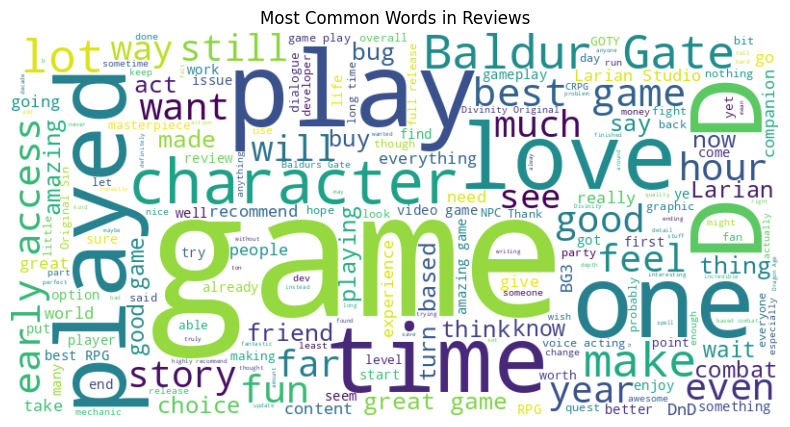

0

In [8]:
# Tokenize each review text into words
word_tokens = [review.split() for review in df['review']]

# Flatten the list of word tokens
word_tokens_flat = [word for sublist in word_tokens for word in sublist]

# Join the word tokens into a single string
text = ' '.join(word_tokens_flat)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

# Convert the word cloud to an image in memory
img_byte_arr = io.BytesIO()
wordcloud.to_image().save(img_byte_arr, format='PNG')
img_byte_arr.seek(0)  # Move cursor to start of the stream

In [9]:
# Total number of reviews
total_reviews = sum(1 for row in df['recommendationid'])

# Total number of unique reviews
unique_reviews = len(df['review'].unique())

# Percentage of unique reviews
unique_reviews_percentage = (unique_reviews / total_reviews) * 100

In [10]:
# Create pie chart for 'written during early access'
early_access_counts = df['written_during_early_access'].value_counts()

fig_early_access_pie = px.pie(
    early_access_counts,
    names=early_access_counts.index,
    values= early_access_counts.values,
    labels={'index': 'Written during early access', 'value': 'Count'},
    title='Yes vs No'
)

In [11]:
# Create pie chart for 'received game for free'
received_game_counts = df['received_for_free'].value_counts()

fig_received_game_pie = px.pie(
    received_game_counts,
    names=received_game_counts.index,
    values= received_game_counts.values,
    labels={'index': 'Received game for free', 'value': 'Count'},
    title='Yes vs No'
)

In [12]:
# Create subplot grid
fig_dashboard = make_subplots(
    rows=3, cols=3,
    subplot_titles=(
        "",
        "",
        "",
        "Number of Reviews per Year",
        "Written during Early Access",
        "Most Common Words in Reviews",
        "Received the game for free",
        "Distribution of Helpful Votes",
        "Recommended vs Not Recommended"
    ),
    specs=[[{"type": "indicator"}, {"type": "indicator"},{"type": "indicator"}],
           [{"type": "bar"}, {"type": "pie"}, {"type": "xy"}],
           [{"type": "pie"}, {"type": "bar"}, {"type": "pie"}]]
)

fig_dashboard.add_trace(go.Indicator(
    title = {"text": "Total Number of Reviews"},
    mode="number",
    value=total_reviews,
    number={"font": {"size": 48}},
), row=1, col=1)

fig_dashboard.add_trace(go.Indicator(
    title = {"text": "Total Number of Unique Reviews"},
    mode="number",
    value=unique_reviews,
    number={"font": {"size": 48}},
), row=1, col=2)

fig_dashboard.add_trace(go.Indicator(
    title = {"text": "Percentage of Unique Reviews"},
    mode="number",
    value= unique_reviews_percentage,
    number={"font": {"size": 48}},
), row=1, col=3)

# Add bar chart
fig_dashboard.add_trace(
    fig_reviews_per_year['data'][0],
    row=2, col=1
)

# Add pie chart
fig_dashboard.add_trace(
    fig_early_access_pie['data'][0],
    row=2, col=2
)

# Convert byte array to base64 string
img_base64 = base64.b64encode(img_byte_arr.getvalue()).decode('utf-8')

# Add image to dashboard
fig_dashboard.add_layout_image(
    dict(
        source='data:image/png;base64,' + img_base64,
        xref="x domain", yref="y domain",
        x=1.05, y=0.47,
        sizex=0.35, sizey=0.35,
        xanchor="right", yanchor="middle"
    ),
    row=2, col=3
)

fig_dashboard.add_trace(
    fig_received_game_pie['data'][0],
    row=3, col=1
)

fig_dashboard.add_trace(
    fig_votes_helpful['data'][0],
    row=3, col=2
)

fig_dashboard.add_trace(
    fig_recommendation_pie['data'][0],
    row=3, col=3
)


# Update layout
fig_dashboard.update_layout(height=800, width=1200,  title={
        'text': "Baldur's Gate 3 Steam Reviews Dashboard",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95,  # Position the title slightly above the top
        'xanchor': 'center',  # Anchor point for x coordinate
        'yanchor': 'top',  # Anchor point for y coordinate
        'font': {'size': 24}  # Adjust font size as needed
    })

# Show dashboard
fig_dashboard.show()